In [1]:
import geopandas as gpd
import pandas as pd
import contextily as cx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
madrid = gpd.read_file('../Equidad/Madrid/madrid_secciones.shp')

In [5]:
madrid.shape

(2443, 18)

In [4]:
ciudadlineal = madrid[madrid['CDIS']=='15'].sort_values(by='CUSEC')

In [6]:
df = pd.read_excel('../Equidad/CiudadLineal_Data.xlsx')

In [7]:
df.head()

,CUSEC,Renta bruta media por persona (2019),CAGR Renta Bruta Personas en % (2019-2015),Renta bruta media por hogar (2019),CAGR Renta Bruta Hogares en % (2019-2015),Edad Media (2019),Porcentaje de población menor de 18 años (2019),Porcentaje de población de 65 y más años (2019),Tamaño medio del hogar (2019),Porcentaje de hogares unipersonales (2019),Población (2019),CAGR Población (2019-2015),Indice Gini (2019),Indice Gini (2018),Indice Gini (2017),Indice Gini (2016),Indice Gini (2015),Dist Renta P80/P20 (2019),Dist Renta P80/P20 (2018),Dist Renta P80/P20 (2017),Dist Renta P80/P20 (2016),Dist Renta P80/P20 (2015)
0,2807915157,31349,3.444989,77607,3.191272,44.0,16.0,20.9,2.41,31.8,1006,0.915195,43.2,41.3,40.8,40.4,44.0,3.9,3.6,3.6,3.5,3.5
1,2807915151,34027,2.485693,90633,3.373089,43.3,19.5,22.7,2.63,27.2,1712,2.155747,43.0,41.5,41.5,43.6,42.2,3.8,3.8,3.8,3.9,3.8
2,2807915160,43400,3.548352,108675,2.743279,44.1,18.4,23.3,2.49,32.8,1890,1.439219,40.9,42.2,39.6,38.8,41.0,3.3,3.1,3.0,3.0,3.1
3,2807915171,16884,4.587405,44698,4.533493,43.2,15.2,17.7,2.63,27.2,1333,1.197818,40.3,39.5,39.7,43.0,40.8,3.4,3.2,3.5,3.7,3.7
4,2807915159,42036,4.814193,106321,3.635780,43.9,18.2,21.6,2.49,31.4,1424,-0.724061,38.9,38.8,38.9,39.0,40.4,3.4,3.2,3.6,3.6,3.8


In [8]:
ciudadlineal['CUSEC'] = pd.to_numeric(ciudadlineal['CUSEC'])

In [9]:
ciudadlineal.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 170 entries, 685 to 888
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CUSEC     170 non-null    int64   
 1   CUMUN     170 non-null    object  
 2   CSEC      170 non-null    object  
 3   CDIS      170 non-null    object  
 4   CMUN      170 non-null    object  
 5   CPRO      170 non-null    object  
 6   CCA       170 non-null    object  
 7   CUDIS     170 non-null    object  
 8   CLAU2     170 non-null    object  
 9   NPRO      170 non-null    object  
 10  NCA       170 non-null    object  
 11  CNUT0     170 non-null    object  
 12  CNUT1     170 non-null    object  
 13  CNUT2     170 non-null    object  
 14  CNUT3     170 non-null    object  
 15  NMUN      170 non-null    object  
 16  seccion   170 non-null    object  
 17  geometry  170 non-null    geometry
dtypes: geometry(1), int64(1), object(16)
memory usage: 25.2+ KB


In [10]:
result = pd.merge(ciudadlineal, df, on='CUSEC')

In [11]:
result.head()

,CUSEC,CUMUN,CSEC,CDIS,CMUN,CPRO,CCA,CUDIS,CLAU2,NPRO,NCA,CNUT0,CNUT1,CNUT2,CNUT3,NMUN,seccion,geometry,Renta bruta media por persona (2019),CAGR Renta Bruta Personas en % (2019-2015),Renta bruta media por hogar (2019),CAGR Renta Bruta Hogares en % (2019-2015),Edad Media (2019),Porcentaje de población menor de 18 años (2019),Porcentaje de población de 65 y más años (2019),Tamaño medio del hogar (2019),Porcentaje de hogares unipersonales (2019),Población (2019),CAGR Población (2019-2015),Indice Gini (2019),Indice Gini (2018),Indice Gini (2017),Indice Gini (2016),Indice Gini (2015),Dist Renta P80/P20 (2019),Dist Renta P80/P20 (2018),Dist Renta P80/P20 (2017),Dist Renta P80/P20 (2016),Dist Renta P80/P20 (2015)
0,2807915001,28079,001,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15001,"POLYGON ((444196.213 4475696.468, 444183.178 4...",19182,1.198944,49386,2.461822,46.0,14.5,24.0,2.56,28.6,1041,1.289309,31.4,30.6,30.8,31.2,31.1,3.1,2.9,2.9,3.1,3.0
1,2807915002,28079,002,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15002,"POLYGON ((444183.990 4475256.965, 444184.395 4...",16700,4.520483,41256,4.769572,46.5,13.5,26.5,2.46,33.2,971,0.895062,34.1,34.4,36.3,35.9,36.9,2.9,3.2,3.3,3.7,3.5
2,2807915003,28079,003,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15003,"POLYGON ((444229.889 4475019.964, 444234.266 4...",18621,3.346103,37788,2.559266,50.1,9.8,31.2,2.01,42.6,983,-0.252719,28.8,30.0,29.9,30.5,31.3,2.2,2.4,2.7,2.5,2.8
3,2807915005,28079,005,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15005,"POLYGON ((445239.639 4475294.449, 445242.016 4...",16457,3.794960,41603,3.142413,49.0,10.7,28.6,2.51,24.3,817,-0.423867,28.2,26.9,27.9,29.4,29.0,2.5,2.3,2.6,2.7,2.6
4,2807915006,28079,006,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15006,"POLYGON ((444812.764 4474833.452, 444809.326 4...",15302,4.216219,38718,4.068702,46.1,13.5,22.3,2.52,28.3,1309,0.898352,30.1,31.3,28.9,28.4,30.8,2.8,2.8,2.8,2.8,2.8


In [12]:
barrios = gpd.read_file('../Equidad/Barrios2021/Barrios.shp')

In [13]:
barrios_cl = barrios[barrios['CODDIS']=='15']

## Transformar a Coordenadas a partir de Geometría

In [14]:
barrios_cl['coords'] = barrios_cl['geometry'].apply(lambda x: x.representative_point().coords[:])
barrios_cl['coords'] = [coords[0] for coords in barrios_cl['coords']]

C:\Users\Pablo\miniconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## Poner Leyenda dentro del Mapa

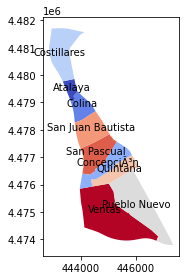

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
barrios_cl.plot(column='NOMBRE', cmap='coolwarm', ax=ax)
texts =[ax.text(row.coords[0], row.coords[1], s=row['NOMBRE'], horizontalalignment='center') for idx, row in barrios_cl.iterrows()]
plt.tight_layout()
plt.show()

### Renta Bruta Personas Ciudad Lineal

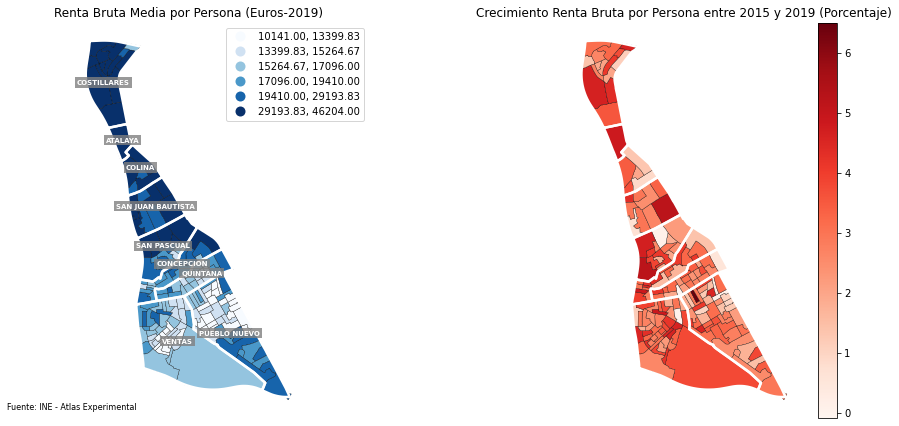

In [17]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
result.plot(column='Renta bruta media por persona (2019)', scheme='quantiles', k=6, cmap='Blues', legend=True, edgecolor='black', 
            linewidth=0.3, legend_kwds={'bbox_to_anchor':(1.3, 1)}, ax=ax1)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax1)
texts = [ax1.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
result.plot(column='CAGR Renta Bruta Personas en % (2019-2015)',
            #scheme='quantiles', k=6,
            cmap='Reds', legend=True, edgecolor='black',linewidth=0.3,
            #legend_kwds={'bbox_to_anchor':(1.3, 1)}
            ax=ax2)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax2)

ax1.set_title("Renta Bruta Media por Persona (Euros-2019)", fontsize=12)
ax2.set_title("Crecimiento Renta Bruta por Persona entre 2015 y 2019 (Porcentaje)", fontsize=12)
fig.suptitle('Fuente: INE - Atlas Experimental', fontsize=8, y=0.55, x=0.2)
ax1.set_axis_off()
ax2.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/rentabruta_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

### Renta Bruta Hogares Ciudad Lineal

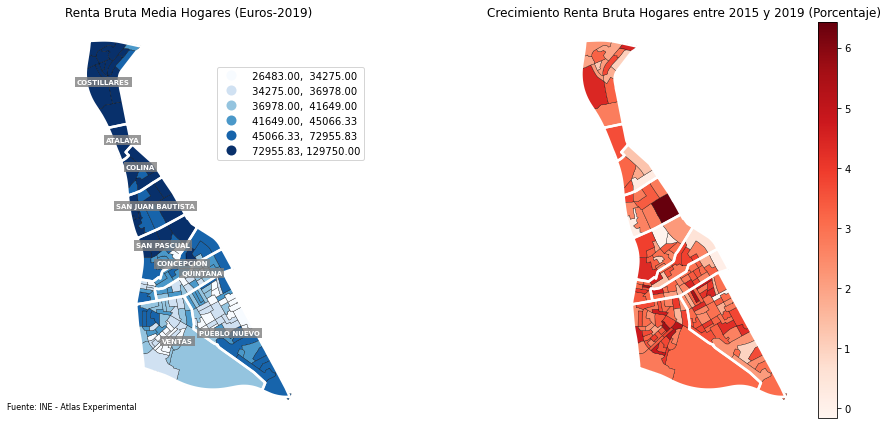

In [18]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
result.plot(column='Renta bruta media por hogar (2019)', scheme='quantiles', k=6, cmap='Blues', legend=True, edgecolor='black', 
            linewidth=0.3, legend_kwds={'bbox_to_anchor':(1.3, 0.9)}, ax=ax1)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax1)
texts = [ax1.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold',fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
result.plot(column='CAGR Renta Bruta Hogares en % (2019-2015)',
            #scheme='quantiles', k=6,
            cmap='Reds', legend=True, edgecolor='black',linewidth=0.3,
            #legend_kwds={'bbox_to_anchor':(1.3, 1)}
            ax=ax2)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax2)

ax1.set_title("Renta Bruta Media Hogares (Euros-2019)", fontsize=12)
ax2.set_title("Crecimiento Renta Bruta Hogares entre 2015 y 2019 (Porcentaje)", fontsize=12)
fig.suptitle('Fuente: INE - Atlas Experimental', fontsize=8, y=0.55, x=0.2)
ax1.set_axis_off()
ax2.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/rentabrutaHogares_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

### Indice de Gini Ciudad Lineal

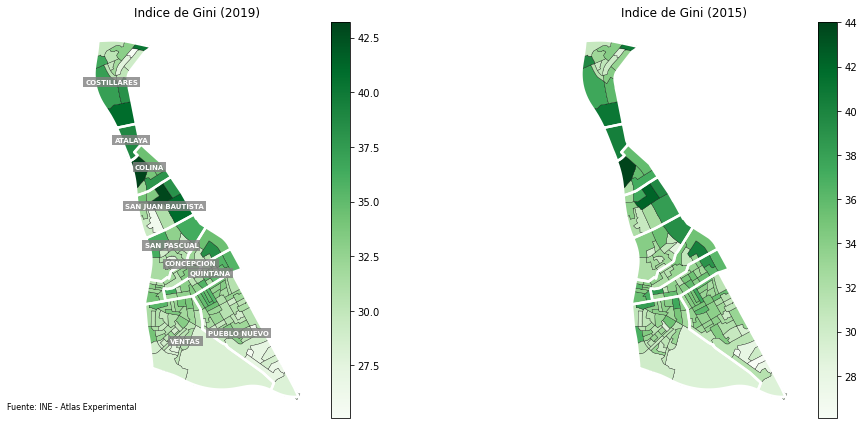

In [19]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
result.plot(column='Indice Gini (2019)', 
            #scheme='quantiles', k=6, 
            cmap='Greens', legend=True, edgecolor='black', linewidth=0.3, 
            #legend_kwds={'bbox_to_anchor':(1.3, 0.9)}, 
            ax=ax1)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax1)
texts = [ax1.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
result.plot(column='Indice Gini (2015)',
            #scheme='quantiles', k=6,
            cmap='Greens', legend=True, edgecolor='black',linewidth=0.3,
            #legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
            ax=ax2)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax2)

ax1.set_title("Indice de Gini (2019)", fontsize=12)
ax2.set_title("Indice de Gini (2015)", fontsize=12)
fig.suptitle('Fuente: INE - Atlas Experimental', fontsize=8, y=0.55, x=0.2)

ax1.set_axis_off()
ax2.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/indiceGini_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

### Distribucion Renta P80/20

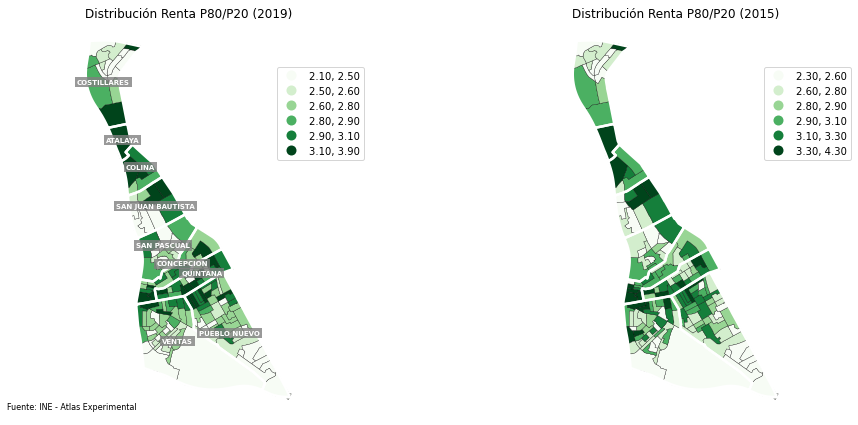

In [20]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
result.plot(column='Dist Renta P80/P20 (2019)', scheme='quantiles', k=6, cmap='Greens', legend=True, edgecolor='black', 
            linewidth=0.3, legend_kwds={'bbox_to_anchor':(1.3, 0.9)}, ax=ax1)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax1)
texts = [ax1.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
result.plot(column='Dist Renta P80/P20 (2015)',
            scheme='quantiles', k=6,
            cmap='Greens', legend=True, edgecolor='black',linewidth=0.3,
            legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
            ax=ax2)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax2)

ax1.set_title("Distribución Renta P80/P20 (2019)", fontsize=12)
ax2.set_title("Distribución Renta P80/P20 (2015)", fontsize=12)
fig.suptitle('Fuente: INE - Atlas Experimental', fontsize=8, y=0.55, x=0.2)
ax1.set_axis_off()
ax2.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/distP80P20_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

In [21]:
demo = gpd.read_file('../Equidad/GeoPortal/20210101_Estructura_demográfica/SECCION_CENSAL/ESTRUCTURA_DEMOGRAFICA_SECCION.shp')

In [22]:
demo_cl = demo[demo['COD_DIS']=='15']

In [23]:
demo_cl['seccion'] = demo_cl['COD_SEC']

C:\Users\Pablo\miniconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [24]:
demo_cl.head()

,Densidad,Edad_Prome,Proporcion,Proporci_1,Proporci_2,Indice_env,Indice_juv,Indice_dep,Indice_est,Indice_ree,Razon_prog,Proporci_3,Proporci_4,Prop_inmig,COD_DIS,COD_BAR,COD_SEC,Shape_STAr,Shape_STLe,geometry,seccion
353,400.663495,45.279006,12.016575,21.754144,34.920635,181.034483,55.238095,50.990615,81.973435,40.000000,78.571429,25.000000,39.848066,19.889503,15,152,15050,36140.052612,834.092098,"POLYGON ((445608.357 4475678.125, 445555.947 4...",15050
362,167.295758,46.573007,11.815562,24.495677,32.941176,207.317073,48.235294,57.013575,76.329787,57.746479,100.000000,13.448607,21.709894,10.662824,15,151,15001,62225.128174,1405.003828,"POLYGON ((444212.914 4475728.325, 444187.344 4...",15001
412,84.499108,45.772955,14.249875,25.338685,24.752475,177.816901,56.237624,65.531561,76.798825,50.458716,90.322581,11.289513,17.711992,5.418966,15,155,15143,235860.476807,1948.955352,"POLYGON ((445311.467 4477561.553, 445122.756 4...",15143
421,325.844376,50.316585,9.463415,30.439024,37.820513,321.649485,31.089744,66.396104,66.486486,53.125000,96.875000,17.365854,30.439024,12.097561,15,152,15077,31456.734741,821.521547,"POLYGON ((446038.856 4475806.840, 445999.616 4...",15077
425,251.031966,45.860269,11.784512,21.324355,44.736842,180.952381,55.263158,49.496644,81.155015,31.746032,103.333333,25.252525,40.291807,17.845118,15,152,15078,35493.487793,828.686422,"POLYGON ((446302.264 4475792.836, 446104.855 4...",15078


### Indice Envejecimiento Ciudad Lineal

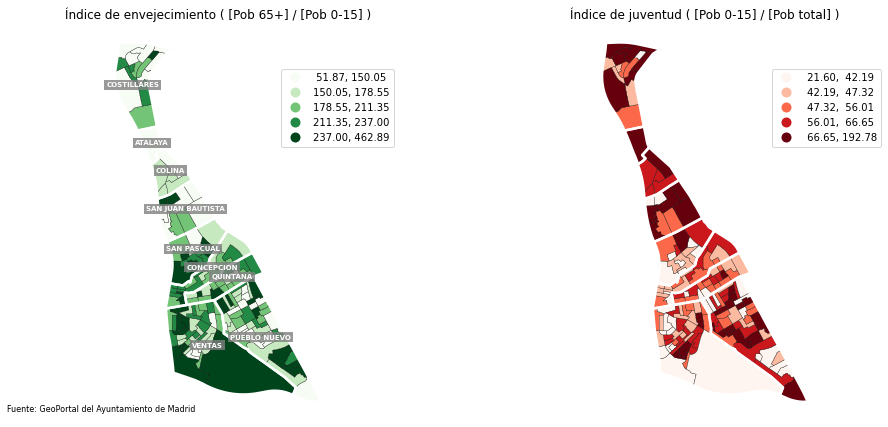

In [25]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
demo_cl.plot(column='Indice_env', 
             scheme='quantiles', k=5, 
             cmap='Greens', legend=True, edgecolor='black', linewidth=0.3, 
             legend_kwds={'bbox_to_anchor':(1.3, 0.9)}, 
             ax=ax1)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax1)
texts = [ax1.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
demo_cl.plot(column='Indice_juv',
            scheme='quantiles', k=5,
            cmap='Reds', legend=True, edgecolor='black',linewidth=0.3,
            legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
            ax=ax2)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax2)
ax1.set_title("Índice de envejecimiento ( [Pob 65+] / [Pob 0-15] )", fontsize=12)
ax2.set_title("Índice de juventud ( [Pob 0-15] / [Pob total] )", fontsize=12)
fig.suptitle('Fuente: GeoPortal del Ayuntamiento de Madrid', fontsize=8, y=0.55, x=0.2)
ax1.set_axis_off()
ax2.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/indice_envejecimiento_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

### Población Extranjera e Inmigrantes Ciudad Lineal

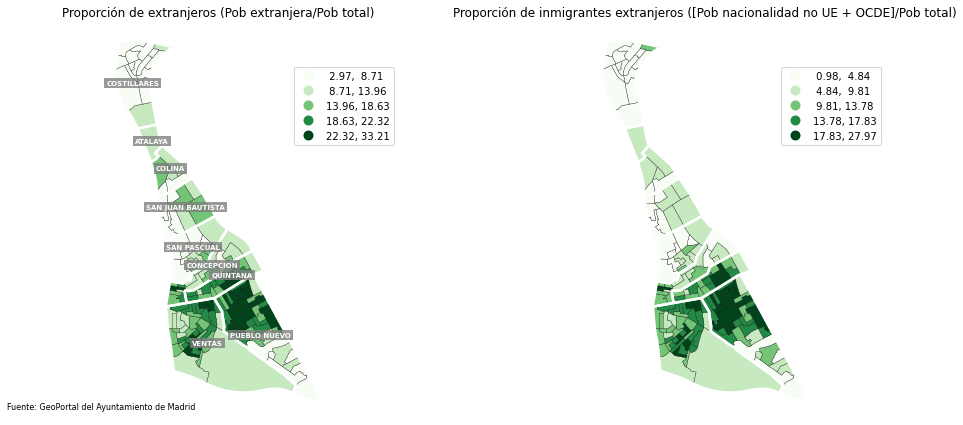

In [26]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
demo_cl.plot(column='Proporci_3', 
             scheme='quantiles', k=5, 
             cmap='Greens', legend=True, edgecolor='black', linewidth=0.3, 
             legend_kwds={'bbox_to_anchor':(1.3, 0.9)}, 
             ax=ax1)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax1)
texts = [ax1.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
demo_cl.plot(column='Prop_inmig',
            scheme='quantiles', k=5,
            cmap='Greens', legend=True, edgecolor='black',linewidth=0.3,
            legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
            ax=ax2)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax2)

ax1.set_title("Proporción de extranjeros (Pob extranjera/Pob total)", fontsize=12)
ax2.set_title("Proporción de inmigrantes extranjeros ([Pob nacionalidad no UE + OCDE]/Pob total)", fontsize=12)
fig.suptitle('Fuente: GeoPortal del Ayuntamiento de Madrid', fontsize=8, y=0.55, x=0.2)
ax1.set_axis_off()
ax2.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/extranjeros_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

### Densidad Población y Edad Promedio Ciudad Lineal

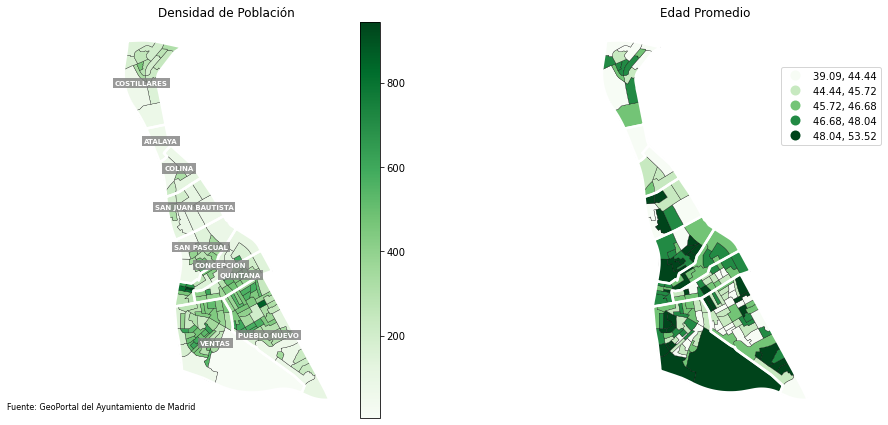

In [27]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
demo_cl.plot(column='Densidad', 
             #scheme='quantiles', k=5, 
             cmap='Greens', legend=True, edgecolor='black', linewidth=0.3, 
             #legend_kwds={'bbox_to_anchor':(1.3, 0.9)}, 
             ax=ax1)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax1)
texts = [ax1.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
demo_cl.plot(column='Edad_Prome',
            scheme='quantiles', k=5,
            cmap='Greens', legend=True, edgecolor='black',linewidth=0.3,
            legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
            ax=ax2)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax2)

ax1.set_title("Densidad de Población", fontsize=12)
ax2.set_title("Edad Promedio", fontsize=12)
fig.suptitle('Fuente: GeoPortal del Ayuntamiento de Madrid', fontsize=8, y=0.55, x=0.2)
ax1.set_axis_off()
ax2.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/densidad_edad_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

In [28]:
estudios = gpd.read_file('../Equidad/GeoPortal/estudios/SECCION/ESTUDIOS_SECCION.shp')

In [29]:
estudios_cl = estudios[estudios['COD_DIS']=='15']

In [30]:
educ_sup = ['ambos_se_7', 'ambos_se_8', 'ambos_se_9', 'ambos_s_10', 'ambos_s_11','ambos_s_12', 'ambos_s_13', 'ambos_s_14']

In [31]:
estudios_cl['educ_sup'] = estudios_cl[educ_sup].sum(axis=1)/estudios_cl['ambos_sexo']*100

C:\Users\Pablo\miniconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [32]:
estudios_h = gpd.read_file('../Equidad/GeoPortal/estudios/SECCION/ESTUDIOS_HOMBRES_SECCION.shp')
estudios_m = gpd.read_file('../Equidad/GeoPortal/estudios/SECCION/ESTUDIOS_MUJERES_SECCION.shp')

In [33]:
estudiosh_cl = estudios_h[estudios_h['COD_DIS']=='15']
estudiosm_cl = estudios_m[estudios_m['COD_DIS']=='15']

In [34]:
educ_suph = ['hombres__2', 'hombres_ot', 'hombres_di', 'hombres_ar', 'hombres_li','hombres_ti', 'hombres_do', 'hombres_de']

In [35]:
estudiosh_cl['educ_sup'] = estudiosh_cl[educ_suph].sum(axis=1)/estudiosh_cl['hombres_to']*100

C:\Users\Pablo\miniconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [36]:
estudiosm_cl.columns

Index(['COD_DIS', 'COD_BAR', 'COD_SEC', 'mujeres_to', 'mujeres_no',
       'mujeres_si', 'mujeres_en', 'mujeres_ba', 'mujeres_FP', 'mujeres__1',
       'mujeres__2', 'mujeres_ot', 'mujeres_di', 'mujeres_ar', 'mujeres_li',
       'mujeres_ti', 'mujeres_do', 'mujeres_de', 'Shape_STAr', 'Shape_STLe',
       'geometry'],
      dtype='object')

In [37]:
educ_supm = ['mujeres__2', 'mujeres_ot', 'mujeres_di', 'mujeres_ar', 'mujeres_li','mujeres_ti', 'mujeres_do', 'mujeres_de']

In [38]:
estudiosm_cl['educ_sup'] = estudiosm_cl[educ_supm].sum(axis=1)/estudiosm_cl['mujeres_to']*100

C:\Users\Pablo\miniconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [39]:
edad = gpd.read_file('../Equidad/GeoPortal/edad/SECCION_CENSAL/POBLACION_SECCION.shp')

In [40]:
edad_cl = edad[edad['COD_DIS']=='15']

### Estudios Superiores Ciudad Lineal

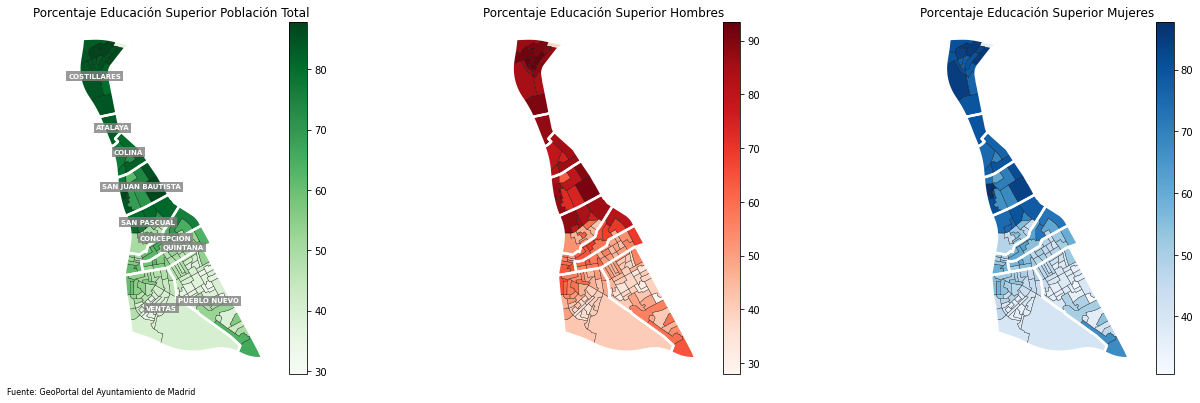

In [41]:
fig = plt.figure(figsize=(22,22))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
estudios_cl.plot(column='educ_sup', 
             #scheme='quantiles', k=5, 
             cmap='Greens', legend=True, edgecolor='black', linewidth=0.3, 
             #legend_kwds={'bbox_to_anchor':(1.3, 0.9)}, 
             ax=ax1)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax1)
texts = [ax1.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
estudiosh_cl.plot(column='educ_sup',
            #scheme='quantiles', k=5,
            cmap='Reds', legend=True, edgecolor='black',linewidth=0.3,
            #legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
            ax=ax2)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax2)

estudiosm_cl.plot(column='educ_sup',
            #scheme='quantiles', k=5,
            cmap='Blues', legend=True, edgecolor='black',linewidth=0.3,
            #legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
            ax=ax3)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax3)
ax1.set_title("Porcentaje Educación Superior Población Total", fontsize=12)
ax2.set_title("Porcentaje Educación Superior Hombres", fontsize=12)
ax3.set_title("Porcentaje Educación Superior Mujeres", fontsize=12)
fig.suptitle('Fuente: GeoPortal del Ayuntamiento de Madrid', fontsize=8, y=0.65, x=0.2)
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/educacionsuperior_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

In [42]:
pobl_sola = pd.read_excel('../Equidad/PoblacionSola_Madrid.xlsx')

In [44]:
pobl_sola['seccion'] = pobl_sola['Sección'].apply(lambda x: '{0:0>5}'.format(x))

In [45]:
pobl_sola.head()

,Sección,Total,Mujer sola (16 a 64 años),Mujer sola (65 o más años),Hombre solo (16 a 64 años),Hombre solo (65 o más años),% Mujer sola (16 a 64 años),% Mujer sola (65 o más años),% Hombre solo (16 a 64 años),% Hombre solo (65 o más años),seccion
0,1001,568,75,52,93,17,0.132042,0.091549,0.163732,0.029930,01001
1,1002,492,111,32,99,17,0.225610,0.065041,0.201220,0.034553,01002
2,1003,862,137,68,164,43,0.158933,0.078886,0.190255,0.049884,01003
3,1004,600,103,55,100,23,0.171667,0.091667,0.166667,0.038333,01004
4,1006,888,123,82,174,47,0.138514,0.092342,0.195946,0.052928,01006


In [46]:
merge_pobsola = pd.merge(ciudadlineal, pobl_sola, on="seccion")

In [47]:
merge_pobsola['% Mujer sola (16 a 64 años)'] = merge_pobsola['% Mujer sola (16 a 64 años)']*100
merge_pobsola['% Mujer sola (65 o más años)'] = merge_pobsola['% Mujer sola (65 o más años)']*100

In [48]:
merge_pobsola['%MujerSola'] = merge_pobsola['% Mujer sola (16 a 64 años)'] + merge_pobsola['% Mujer sola (65 o más años)']

In [49]:
merge_pobsola.head()

,CUSEC,CUMUN,CSEC,CDIS,CMUN,CPRO,CCA,CUDIS,CLAU2,NPRO,NCA,CNUT0,CNUT1,CNUT2,CNUT3,NMUN,seccion,geometry,Sección,Total,Mujer sola (16 a 64 años),Mujer sola (65 o más años),Hombre solo (16 a 64 años),Hombre solo (65 o más años),% Mujer sola (16 a 64 años),% Mujer sola (65 o más años),% Hombre solo (16 a 64 años),% Hombre solo (65 o más años),%MujerSola
0,2807915001,28079,001,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15001,"POLYGON ((444196.213 4475696.468, 444183.178 4...",15001,407,29,44,23,21,7.125307,10.810811,0.056511,0.051597,17.936118
1,2807915002,28079,002,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15002,"POLYGON ((444183.990 4475256.965, 444184.395 4...",15002,398,37,53,27,17,9.296482,13.316583,0.067839,0.042714,22.613065
2,2807915003,28079,003,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15003,"POLYGON ((444229.889 4475019.964, 444234.266 4...",15003,488,63,86,37,20,12.909836,17.622951,0.075820,0.040984,30.532787
3,2807915005,28079,005,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15005,"POLYGON ((445239.639 4475294.449, 445242.016 4...",15005,325,18,32,20,9,5.538462,9.846154,0.061538,0.027692,15.384615
4,2807915006,28079,006,15,079,28,13,2807915,28079,Madrid,Comunidad de Madrid,ES,3,0,0,Madrid,15006,"POLYGON ((444812.764 4474833.452, 444809.326 4...",15006,519,33,55,41,19,6.358382,10.597303,0.078998,0.036609,16.955684


### Mujeres Solas

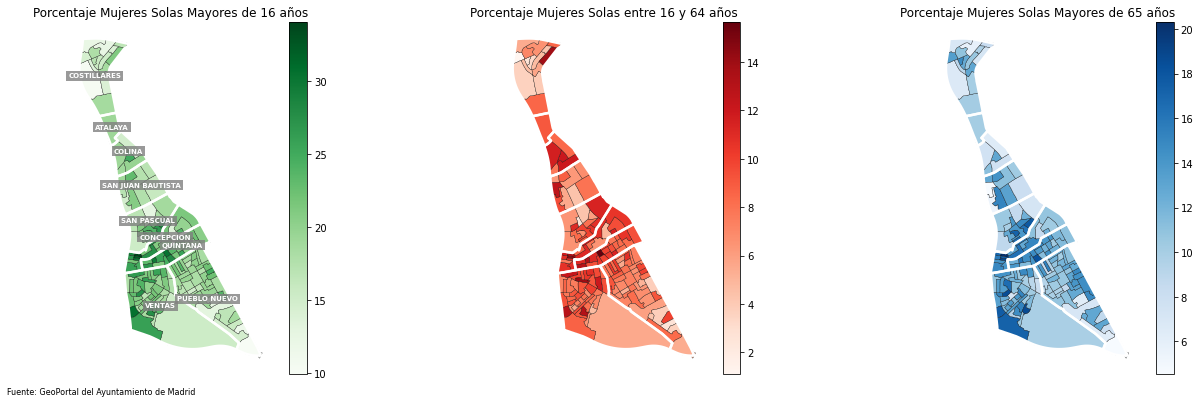

In [50]:
fig = plt.figure(figsize=(22,22))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
merge_pobsola.plot(column='%MujerSola', 
             #scheme='quantiles', k=5, 
             cmap='Greens', legend=True, edgecolor='black', linewidth=0.3, 
             #legend_kwds={'bbox_to_anchor':(1.3, 0.9)}, 
             ax=ax1)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax1)
texts = [ax1.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
merge_pobsola.plot(column='% Mujer sola (16 a 64 años)',
            #scheme='quantiles', k=5,
            cmap='Reds', legend=True, edgecolor='black',linewidth=0.3,
            #legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
            ax=ax2)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax2)

merge_pobsola.plot(column='% Mujer sola (65 o más años)',
            #scheme='quantiles', k=5,
            cmap='Blues', legend=True, edgecolor='black',linewidth=0.3,
            #legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
            ax=ax3)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax3)
ax1.set_title("Porcentaje Mujeres Solas Mayores de 16 años", fontsize=12)
ax2.set_title("Porcentaje Mujeres Solas entre 16 y 64 años", fontsize=12)
ax3.set_title("Porcentaje Mujeres Solas Mayores de 65 años", fontsize=12)
fig.suptitle('Fuente: GeoPortal del Ayuntamiento de Madrid', fontsize=8, y=0.65, x=0.2)
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/poblacionSola_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

In [51]:
edad_h = gpd.read_file('../Equidad/GeoPortal/edad/SECCION_CENSAL/POBLACION_HOMBRES_SECCION.shp')

In [52]:
edadcl_h = edad_h[edad_h['COD_DIS']=='15']

In [53]:
edad_m = gpd.read_file('../Equidad/GeoPortal/edad/SECCION_CENSAL/POBLACION_MUJERES_SECCION.shp')

In [54]:
edadcl_m = edad_m[edad_m['COD_DIS']=='15']

In [55]:
edadclh_nvo = edadcl_h[['COD_SEC','COD_BAR','COD_DIS','hombres_to']]

In [56]:
edadclm_nvo = edadcl_m[['COD_SEC','COD_BAR','COD_DIS','mujeres_to']]

In [57]:
edadclh_nvo

,COD_SEC,COD_BAR,COD_DIS,hombres_to
353,15050,152,15,666
362,15001,151,15,472
412,15143,155,15,838
421,15077,152,15,465
425,15078,152,15,397
...,...,...,...,...
2213,15170,159,15,1001
2216,15173,159,15,901
2384,15140,155,15,593
2411,15053,152,15,724


In [58]:
edad_cl.head(1)

,COD_SEC,COD_BAR,COD_DIS,ambos_sexo,ambos_se_1,ambos_se_2,ambos_se_3,ambos_se_4,ambos_se_5,ambos_se_6,ambos_se_7,ambos_se_8,ambos_se_9,ambos_s_10,ambos_s_11,ambos_s_12,ambos_s_13,ambos_s_14,ambos_s_15,ambos_s_16,ambos_s_17,ambos_s_18,ambos_s_19,ambos_s_20,ambos_s_21,Shape_STAr,Shape_STLe,geometry
353,15050,152,15,1448,44,56,62,48,76,101,116,103,134,115,95,93,90,70,68,67,61,30,12,6,1,36140.052612,834.092098,"POLYGON ((445608.357 4475678.125, 445555.947 4..."


In [59]:
ed1 = pd.merge(edad_cl, edadclh_nvo, on='COD_SEC')

In [60]:
edad_tot = pd.merge(ed1, edadclm_nvo, on='COD_SEC')

In [61]:
edad_tot['Porcentaje_Hombres'] = edad_tot['hombres_to']/edad_tot['ambos_sexo']*100
edad_tot['Porcentaje_Mujeres'] = edad_tot['mujeres_to']/edad_tot['ambos_sexo']*100

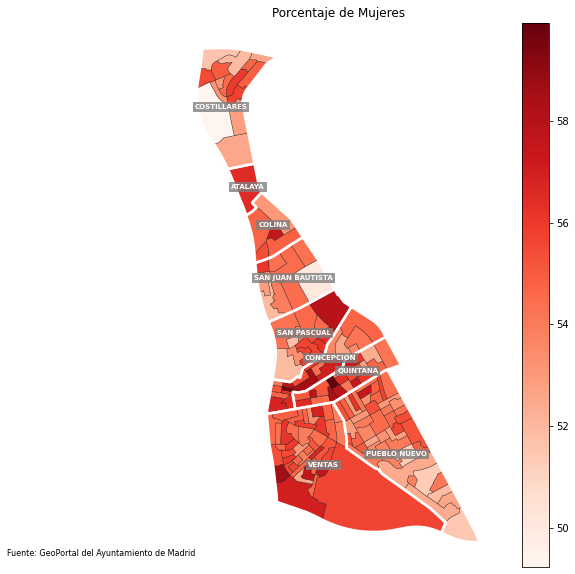

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
edad_tot.plot(column='Porcentaje_Mujeres', 
             #scheme='quantiles', k=5, 
             cmap='Reds', legend=True, edgecolor='black', linewidth=0.3, 
             #legend_kwds={'bbox_to_anchor':(1.3, 0.9)}, 
             ax=ax)
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax)
texts = [ax.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
ax.set_title("Porcentaje de Mujeres", fontsize=12)
fig.suptitle('Fuente: GeoPortal del Ayuntamiento de Madrid', fontsize=8, y=0.15, x=0.2)
ax.set_axis_off()
#plt.savefig('../Equidad/CiudadLineal/poblacionMujeres_CiudadLineal.jpg', dpi=400, bbox_inches='tight')

#### Valor Catasatral Ciudad Lineal

In [63]:
vc = pd.read_excel('../Equidad/valor_catastral.xlsx')

In [64]:
vc

,COD_DISBAR,Valor catastral medio (vivienda residencial)
0,158,214741.47
1,159,196171.28
2,156,164343.22
3,157,155775.81
4,155,117658.43
5,154,97944.71
6,153,86556.62
7,152,82778.03
8,151,77500.11


In [68]:
vc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COD_DISBAR                                    9 non-null      int64  
 1   Valor catastral medio (vivienda residencial)  9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 272.0 bytes


In [69]:
barrios_cl['COD_DISBAR'] = pd.to_numeric(barrios_cl['COD_DISBAR'])

C:\Users\Pablo\miniconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [70]:
vc_merge = pd.merge(barrios_cl, vc, on='COD_DISBAR')

In [72]:
vc_merge.head(3)

,CODDIS,NOMDIS,COD_BAR,NOMBRE,Shape_Leng,Shape_Area,COD_DIS_TX,BARRIO_MAY,COD_DISBAR,NUM_BAR,BARRIO_MT,COD_DISB,geometry,coords,Valor catastral medio (vivienda residencial)
0,15,Ciudad Lineal,151,Ventas,8215.640220,3.188995e+06,15,VENTAS,151,1,VENTAS,15-1,"POLYGON ((446800.721 4474048.030, 446781.975 4...","(444865.2622700518, 4474989.812)",77500.11
1,15,Ciudad Lineal,152,Pueblo Nuevo,7760.987522,2.322110e+06,15,PUEBLO NUEVO,152,2,PUEBLO NUEVO,15-2,"POLYGON ((447317.620 4473790.308, 447280.591 4...","(446031.88472104166, 4475165.141)",82778.03
2,15,Ciudad Lineal,153,Quintana,4439.160794,7.229678e+05,15,QUINTANA,153,3,QUINTANA,15-3,"POLYGON ((446105.101 4476630.744, 446093.323 4...","(445412.3739922, 4476501.1485)",86556.62


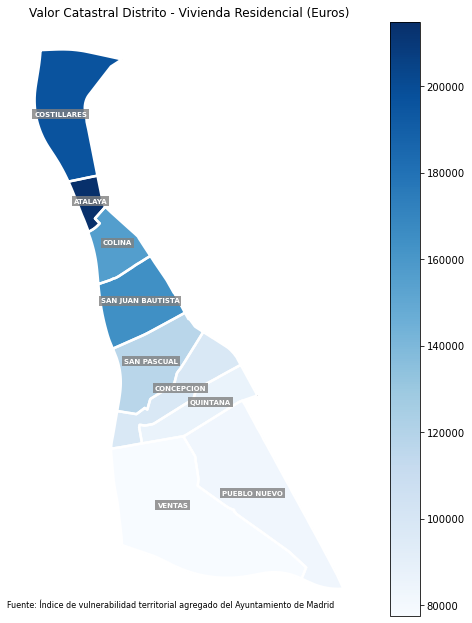

In [91]:
fig, ax = plt.subplots(figsize=(9,9))
vc_merge.plot(column='Valor catastral medio (vivienda residencial)', 
              ax=ax, 
              #scheme='quantiles', k=5,
              cmap='Blues', legend=True, edgecolor='black', linewidth=0.3,
              #legend_kwds={'bbox_to_anchor':(1.3, 0.9)},
              )
barrios_cl.plot(linewidth=2.5, facecolor='None', edgecolor='white', ax=ax)
texts = [ax.text(row.coords[0], row.coords[1], s=row['BARRIO_MAY'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'grey', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in barrios_cl.iterrows()]
ax.set_title("Valor Catastral Distrito - Vivienda Residencial (Euros)", fontsize=12)
plt.tight_layout()
ax.set_axis_off()
fig.suptitle('Fuente: Índice de vulnerabilidad territorial agregado del Ayuntamiento de Madrid', fontsize=8, y=0.07, x=0.5);
plt.savefig('../Equidad/CiudadLineal/valorcatastral.jpg', dpi=400, bbox_inches='tight')